In [1]:
import pandas as pd
import pathlib
from ipywidgets import interact
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import square_optimize

In [2]:
event_dir = pathlib.Path("./231013-2/DBNS/-200mV/output_0023/events")
event_list = list(event_dir.iterdir())

In [9]:
class Event:
    def __init__(self, event_path):
        self.event = pd.read_csv(event_path, names = ["time", "raw", "fit", "filter"])
    def max_current(self):
        return self.event["raw"].max()
    def dwell_time(self, threshold):
        if self.event["raw"].max()<=threshold:
            return 0
        return self.event[self.event["raw"]>threshold].index[-1] - self.event[self.event["raw"]>threshold].index[0]
        
    def plot(self):
        self.event.plot(x="time", y="raw")
        
    def plot_opt(self):
        model = square_optimize.Model(self.event.rename({'raw': 'values'}, axis='columns'), Kmax=9)
        model.plot()

class AllEvent:
    def __init__(self, event_list):
        self.event_list = event_list
    def scatter_dwelltime_maxcurrent(self, threshold, xscale='log', yscale='linear', right=None):
        dwell_times = list(map(lambda event_path: Event(event_path).dwell_time(threshold), self.event_list))
        max_current = list(map(lambda event_path: Event(event_path).max_current(), self.event_list))
        plt.scatter(dwell_times, max_current)
        plt.xlabel('dwell_time')
        plt.ylabel('max_current')
        plt.xscale(xscale)
        plt.yscale(yscale)
        if xscale=='log':
            plt.xlim(left=1, right=right)
        else:
            plt.xlim(right=right)

        plt.show()

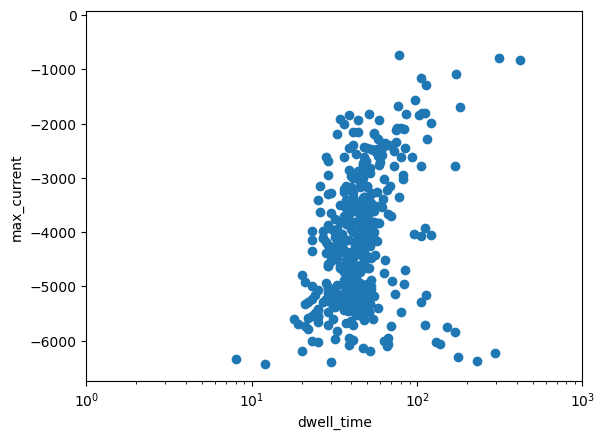

In [4]:
AllEvent(event_list).scatter_dwelltime_maxcurrent(threshold=-6500, right=1000)

In [5]:
def plot_event(event_path):
    event = Event(event_path)
    event.plot()
interact(plot_event, event_path = event_list)

interactive(children=(Dropdown(description='event_path', options=(PosixPath('231013-2/DBNS/-200mV/output_0023/…

<function __main__.plot_event(event_path)>

In [11]:
filtered_event = list(filter(lambda event_path: Event(event_path).max_current()>-4000, event_list))
interact(plot_event, event_path = filtered_event)

interactive(children=(Dropdown(description='event_path', options=(PosixPath('231013-2/DBNS/-200mV/output_0023/…

<function __main__.plot_event(event_path)>

In [10]:
def plot_opt_event(event_path):
    event = Event(event_path)
    event.plot_opt()
interact(plot_opt_event, event_path = event_list)

interactive(children=(Dropdown(description='event_path', options=(PosixPath('231013-2/DBNS/-200mV/output_0023/…

<function __main__.plot_opt_event(event_path)>